<a href="https://colab.research.google.com/github/manyajsingh/MachineLearning/blob/Personal_ML/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('Classified Data.csv', index_col=0) # set index_col=0 to use first column as index

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1




```
Because the KNN classifier predicts the class of a given test observation by
identifying the observations that are nearest to it, the scale of the
variables matters.
Variables that are on a large scale will have a much larger effect on the distance between observations,
and hence, on the KNN classifier, than variables that are on a small scale
```



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features=scaler.transform(df.drop('TARGET CLASS', axis=1))
df_feat=pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[139   8]
 [  7 146]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.95      0.95      0.95       153

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
# choosing a k value
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

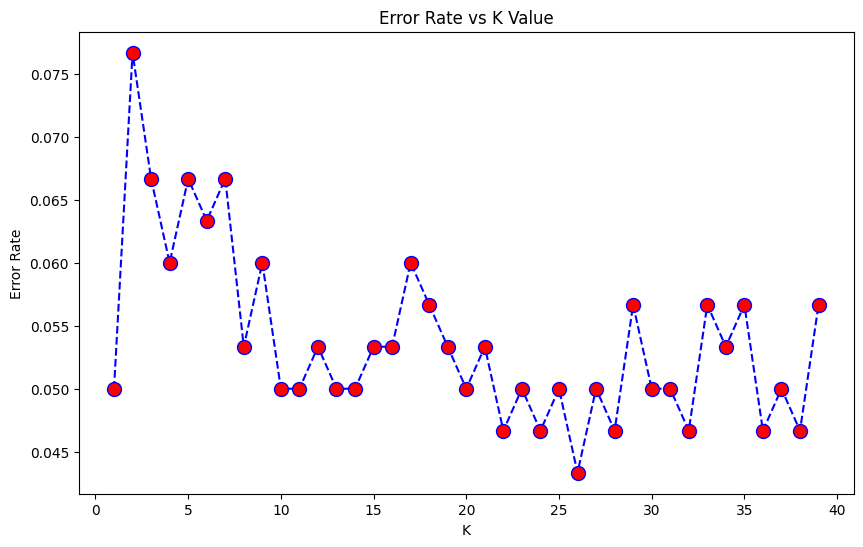

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# comparison to original K
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
print("With K=1: ")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

With K=1: 
[[139   8]
 [  7 146]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.95      0.95      0.95       153

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
knn=KNeighborsClassifier(n_neighbors=26) # avoid even numbers whenever possible
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
print("With K=23: ")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

With K=23: 
[[140   7]
 [  6 147]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       147
           1       0.95      0.96      0.96       153

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



**HANDLING IMBALANCED DATASETS**

**1. UNDER SAMPLING**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import sklearn_pandas
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=['Normal','Fraud']

data=pd.read_csv('creditcard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
columns=data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
target="Class"
state=np.random.RandomState(49)
print(state)
x=data[columns]
y=data[target]
x_outliers=state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

RandomState(MT19937)
(284807, 30)
(284807,)


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.fillna(method='ffill', limit=1, inplace=True)

<Axes: >

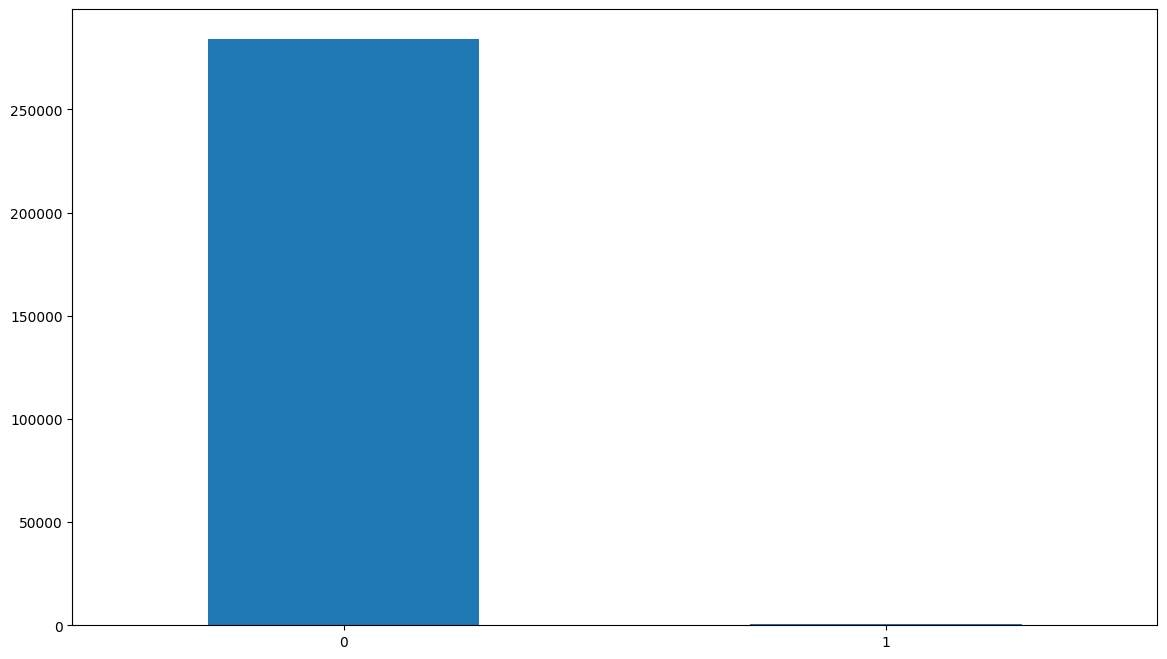

In [ ]:
count_classes=pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)

In [ ]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [ ]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
x_res, y_res=nm.fit_resample(x,y)
print(x_res.shape, y_res.shape)

(984, 30) (984,)


In [ ]:
from collections import Counter
print("Original dataset shape{}".format(Counter(y)))
print("Original dataset shape{}".format(Counter(y_res)))

Original dataset shapeCounter({0: 284315, 1: 492})
Original dataset shapeCounter({0: 492, 1: 492})


**2. OVER SAMPLING**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
data_=pd.read_csv('creditcard.csv', sep=',')
data_.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
columns_=data_.columns.tolist()
columns_=[c for c in columns_ if c not in ['Class']]
target=['Class']
state=np.random.RandomState(8)
x=data_[columns_]
y=data_[target]
print(x.shape, y.shape)

(284807, 30) (284807, 1)


In [ ]:
data_.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

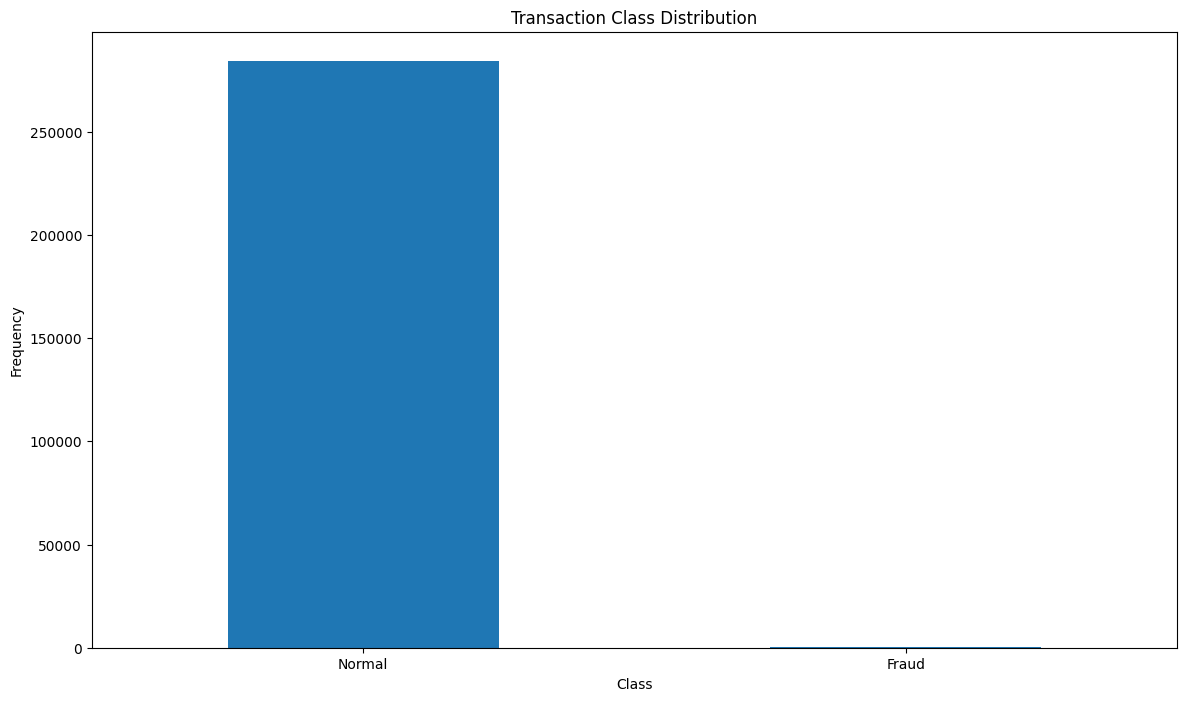

In [ ]:
count_classes_=pd.value_counts(data_['Class'], sort=True)
count_classes_.plot(kind='bar', rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
fraud=data_[data_['Class']==1]
normal=data_[data_['Class']==0]

print(fraud.shape, normal.shape)

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

smk=SMOTETomek(random_state=42)
x_res, y_res=smk.fit_resample(x,y)

print(x_res.shape, y_res.shape)

(492, 31) (284315, 31)


In [ ]:
from collections import Counter
print("Original Dataset shape{}".format(Counter(y)))
print("Resampled Dataset shape{}".format(Counter(y_res)))

NameError: ignored

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(ratio=0.5)
x_train_res, y_train_res=os.fit_sample(x,y)
print(x_train_res.shape, y_train_res.shape)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

os_us = SMOTETomek(ratio=0.5)
x_train_res1, y_train_res1 = os_us.fit_sample(x,y)
print(x_train_res1.shape,y_train_res1.shape)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))